In [1]:
import os, sys, pathlib
sys.path.insert(0, str(pathlib.Path(os.getcwd()).parents[2]))
sys.path.insert(0, str(pathlib.Path(os.getcwd()).parents[2]) + '/brPY/')
import datajoint as dj
from churchland_pipeline import action, acquisition, equipment, lab, processing, reference
from churchland_pipeline.rigs.Jumanji import speedgoat
from churchland_pipeline.tasks.pacman import pacman_acquisition, pacman_processing
from churchland_pipeline.users.njm2149 import datajoint_utilities as dju
images_path = '/Users/Najja/Documents/code/data-synthesis/datajoint-churchland/churchland_pipeline/images/'

Connecting ChurchlandLab_test@s1n4.u19motor.zi.columbia.edu:3306


In [2]:
import re, inspect
import pandas as pd
import numpy as np
from datetime import datetime
from brpylib import NsxFile, brpylib_ver
from collections import ChainMap

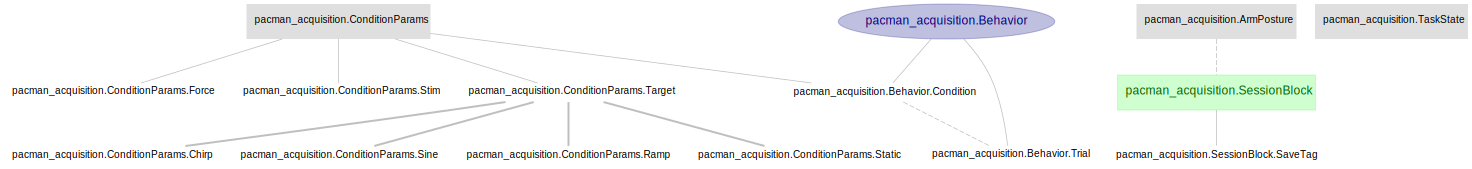

In [4]:
dj.ERD(pacman_acquisition)

In [24]:
acquisition.BehaviorRecording()

session_date session date,monkey unique monkey name,behavior_summary_file_path path to summary file (temporary),behavior_sample_rate sampling rate for behavioral data [Hz]
2018-04-13,Cousteau,/srv/locker/churchland/Jumanji/pacman-task/cousteau/raw/2018-04-13/speedgoat/pacman-task_c_180413_beh.summary,1000
2018-10-02,Cousteau,/srv/locker/churchland/Jumanji/pacman-task/cousteau/raw/2018-10-02/speedgoat/pacman-task_c_181002_beh.summary,1000
2019-01-30,Cousteau,/srv/locker/churchland/Jumanji/pacman-task/cousteau/raw/2019-01-30/speedgoat/pacman-task_c_190130_beh.summary,1000
2019-05-20,Cousteau,/srv/locker/churchland/Jumanji/pacman-task/cousteau/raw/2019-05-20/speedgoat/pacman-task_c_190520_beh.summary,1000
2019-08-13,Cousteau,/srv/locker/churchland/Jumanji/pacman-task/cousteau/raw/2019-08-13/speedgoat/pacman-task_c_190813_beh.summary,1000
2020-01-06,Cousteau,/srv/locker/churchland/Jumanji/pacman-task/cousteau/raw/2020-01-06/speedgoat/pacman-task_c_200106_beh.summary,1000


In [ ]:
# aggregate pipelines
Pipeline = {'common': dj.ERD(action) + dj.ERD(acquisition) + dj.ERD(equipment) + dj.ERD(lab) + dj.ERD(processing) + dj.ERD(reference),
            'pacman': dj.ERD(pacman_acquisition) + dj.ERD(pacman_processing),
            'emg': (dj.ERD(acquisition.EmgChannelGroup)-1) + (dj.ERD(processing.MotorUnit)-1+10) - dj.ERD(pacman_processing),
            'neural': (dj.ERD(acquisition.NeuralChannelGroup)-1) + (dj.ERD(processing.Neuron)-1+10) - dj.ERD(pacman_processing)}

### Questions

In [ ]:
"""

inconsistency in ERD drawings
some way to impose a populate constraint between tables (don't want to inherit keys, but want one populated before another)
proj not working for dependent table in matlab
"""

In [ ]:
"""
- Part tables should be (conceptually) populated at the same time as the master table
- Things that might change later should be manual tables that depend on the imported one
- Shan's suggestion for using flexible task parameters typically works best if you have a model that may depend on few parameters and
sometimes more parameters
- can save pngs as attachments

use dict.update() to insert multiple keys at once
insert a list of keys in acq.EphysRecording to improve performance
dict(**key) will create a copy of all the key fields (same as .copy())
"""